# Deep Learning & Business Analytics
## Tutorial 1: Setting up the environment
### Dr. Jie Tao, Fairfield University

# Part 0: Deep Learning Environments

## Deep Learning Envrionments

- As deep learning becoming more and more popular, there are a few environments used in the field:
  - ``Tensorflow`` is the most popular envrionment for building your deep neural networks
    - It is __powerful__, but also __harder-to-use__
  - ``Keras`` is an API building on ``Tensorflow`` which makes the latter easier to use
    - With the new version of ``Tensorflow``, ``Keras`` is part of it

In [ ]:
import tensorflow as tf
# you should always check the version of your ``Tensorflow``
tf.__version__

'2.12.0'

As we can observe above, Colab by default use ``Tensorflow`` 2.0, which is fundamentally from ``Tensorflow`` 1.0. A ton of tutorials you find online are written on ``Tensorflow`` 1.0, so you can always force Colab to use it.

__NOTE__: you need to restart the runtime here.

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
# you should always check the version of your ``Tensorflow``
tf.__version__

ValueError: ignored

Now you see we are using the ``Tensorflow`` 1.0.

Below code shows you how to load ``Keras``.

In [ ]:
from tensorflow import keras
# you should also check the version of ``keras``
keras.__version__

'2.12.0'

From the version of ``Keras``, you see ``tf`` in there, that's indicating you are using ``Tensorflow`` as your __backend__, which means you are using ``Tensorflow`` via ``Keras`` to build your NNs.

Unless you want to build very sophisticated NNs, you should always consider using ``Keras`` over ``Tensorflow``.

If you want to specify which version of ``Tensorflow`` or ``Keras``, you can force to install a certain version:
``` bash
%pip install -U tensorflow == 2.1.0
```



## Deep Learning Environments

- Another important DL envrionment is ``PyTorch``
  - a lot advanced networks are built in ``PyTorch``, if you plan to use them in your analysis, you should use ``PyTorch``
  - Otherwise if you plan to build your own networks, you should use ``Keras``/``Tensorflow``

In [ ]:
import torch

torch.__version__

'2.0.1+cu118'

## GPU vs CPU

- Graphical Processing Units (GPUs) are in general much faster than the CPUs in your computer
- Using GPU is the standard to training your NNs
- Refer to [this notebook](https://colab.research.google.com/notebooks/gpu.ipynb) for using GPUs on Colab
  - You may have limit of 10 hours/month to use the free GPU on Colab


In [ ]:
# you can use code below to test what GPU you are using with ``Tensorflow``

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

If you decide to use ``PyTorch``, it provides detailed information of the GPU being used, if available.

In [ ]:
# Which device is used?
# 0 refers to the first GPU
torch.cuda.current_device()

0

In [ ]:
# how many devices available?
# only 1
torch.cuda.device_count()

1

In [ ]:
# which device is used?
torch.cuda.get_device_name(0)

'Tesla T4'

You may get ``Tesla T4`` or ``Tesla K80`` from Colab, based on the availablility.

# Part 1: A Brief ``Keras`` Example

In this example, we are going to build a simple NN to classify hand-written numbers, which is the MNIST dataset. This dataset is so popular, we will see it multiple times in this course.

### Load Data

``Keras`` has provided the MNIST dataset for us, we just need to (down)load it.


In [ ]:
from tensorflow.keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# check how much data we have
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


Looks like we are using `60,000` images to predict `10,000` images.

We should also check the labels.

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


Great, so it appears that we have `60,000` samples in our training set, and the images are $28 \times 28$ pixels each.

Let's look at these ``images``.

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Clearly this one does not look like any image we know. We can use the help of ``matplotlib`` to show them.

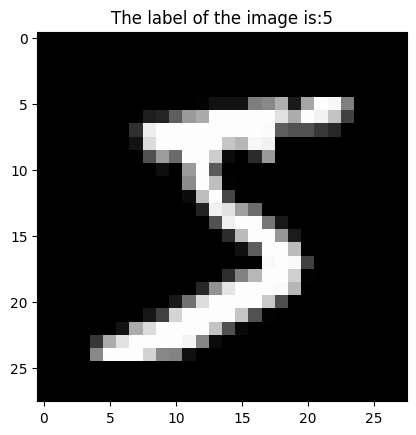

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
# we just want to show the image in grayscale
plt.imshow(X_train[0], cmap='gray', vmin=0, vmax=255)
# also showing the label of the image
plt.title('The label of the image is:' + str(y_train[0]));

### Preprocessing Data

When using  any backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of `3`.

Our MNIST images only have a depth of `1` (i.e., grayscale), but we must explicitly declare that.

In other words, we want to transform our dataset from having shape (n, width, height) to (n, width, height, depth), in which:
- `n` is the number of images in the training/testing set;
- ``heights/weights`` is the dimension of images (i.e., ``28``);
- ``depth`` is the color channel of the images (grayscale: 1, RGB: 3).

__NOTE__: we usually deal with __square__ images only.

In [ ]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# check if the reshape worked as expected
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


The final preprocessing step for the input data is to convert our data type to ``float32`` and normalize our data values to the range $[0, 1]$.

This is because of the _activation function_ we used in NN, which will be discussed in study units 2 & 3.

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Preprocess Labels

Since this is essentially a multi-class classification problem (i.e., classes 0 ~ 9), but the current ``y_train`` or ``y_test`` does not reflect that.

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

And there's the problem. The `y_train` and `y_test` data are not split into `10` distinct class labels, but rather are represented as _a single array_ with the class values.

We can fix this easily:

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# we can test if it is fixed

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


### Define Model Architecture

``Keras`` is popular since it provides various APIs for the model, and the layers in the model.

So before the define the model architecture we need to import the required APIs.

We are going to use the _most popular_ architecture for image classification, namely _Convolutional Neural Networks_ (CNN), which use the pairs of ``Convolution2D`` and ``MaxPooling2D`` layers. We are going to discuss this architecture and also delve into the other layers later in this course.

And for putting the layers together, we are using the ``Sequential`` API. We are going to talk about another API in the next part.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten

In [ ]:
# Initialize the model
model = Sequential()
# add INPUT layer
# first argument is number of neurons in the layer
# usually exponentials of 2
# also need to define what is the moving window and
# to specify the activation function (discuss later)
# and the shape of input - FOREACH image
model.add(Convolution2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=X_train.shape[1:])) ### Overlap between Groups
# Convolution2D and Maxpooling2D is a pair of layers
# whenever you use the former you need to add the latter
model.add(MaxPooling2D(pool_size=(2, 2))) ### No Overlap

In [ ]:
# we can look at what is the output of the model
print(model.output_shape)

(None, 13, 13, 32)


We already discussed in the lecture that DL require __more than one__ hidden layer (between _input_ and _output_ layers), so we need to at least add a second pair.

Shape of the output of the first layer has to match the input of the second layer, and so forth.

In [ ]:
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# we can look at what is the output of the model
print(model.output_shape)

(None, 5, 5, 64)


In [ ]:
# we can then flatten (convert data to 1D)
# so the model can make predictions out of it
model.add(Flatten())
# then add a Dense layer for prediction
model.add(Dense(256, activation='relu'))

In [ ]:
# finally the output layer
# for classification it is always the Dense layer
# with the 'softmax' activation functions (discuss later)
# number of neuron in this layer equals to
# the number of class for prediction
model.add(Dense(10, activation='softmax'))

### Compile the Model

Like any ML models, the DL model needs to be compiled before it can be trained.

In particular, we need to define several __hyperparameters__ of the model, including:
- _loss function_: how does the model measure the prediction error;
- _optimizer_: how does the model minimize the loss;
- _metric_: what measure is used to measure the performance of the model.

We are going to talk more about these __hyperparameters__, and some others, later in this course.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

After compiling and before training, it is good practice to check the ``summary`` of the model.

All the info may not mean a lot to you now, but later in this course you will know this is a good check of your model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

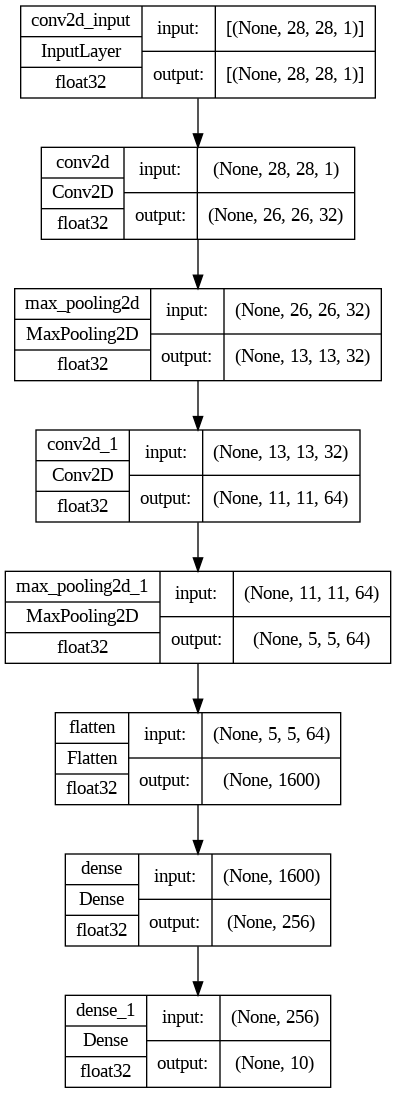

In [ ]:
from tensorflow.keras.utils import plot_model


plot_model(model, show_shapes=True, show_dtype=True)

### Fit the Model

Now we can fit the compiled model to the training data (``X_train`` and ``y_train``).

This step also takes several arguments:
- batch_size: parts of dataset used to update the weights in the network once;
- epochs: one epoch is when the **entire** dataset is passed through the network - an epoch = one or more batches;
- verbose: how much info to be displayed.

We will talk more about these later in this course.

In [ ]:
model.fit(X_train, y_train,
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1146 - accuracy: 0.9647
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0402 - accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0106 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

### Evaluate the Model

Now we need to evaluate the model with the test data (``y_train`` and ``y_test``).

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

``score`` is a tuple of two, the first one is the __test loss__, and the second one is the __test accuracy__.

From the results below we can see that our model exceeds 99% accuracy.

In [ ]:
score

[0.03406137228012085, 0.991599977016449]

Sometimes we only need to predict one instance, ``Keras`` provides two method:
- ``.predict()``: predict the class of the instance;
- ``.predict_proba()``: predict the probability of each class given the instance.

We randomly select several instances from the test set.

In [ ]:
import numpy as np
np.random.seed(2020)
test_sample = np.random.choice(X_test.shape[0], size=5, replace=False)
test_sample

array([4436, 3829, 2434, 4449,   43])

In [ ]:
import numpy as np

In [ ]:
# define a function to predict one instance at a time
def predict_one(sample, model):
  #for ts in sample:
  #proba = model.predict_proba(X_test[ts])
  y_pred = model.predict(X_test[sample])
  pred_class = np.argmax(y_pred, axis=1)
  for ts, pred in zip(sample, pred_class):
    print(f'actual class is {np.argmax(y_test[ts])}, predicted class is {pred}')

In [ ]:
predict_one(test_sample, model)

1/1 [==============================] - 0s 153ms/step
actual class is 9, predicted class is 9
actual class is 8, predicted class is 8
actual class is 1, predicted class is 1
actual class is 6, predicted class is 6
actual class is 2, predicted class is 2


# Part 2: Sequential vs. Functional API

Aside from the ``Sequential`` API, ``Keras`` also provides a functional API.

Compared to the ``Sequential`` API - which is very straightforward, the functional API is usually used if you need to create a more complicated model architecture.

Observe the examples below for comparison.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# this function returns a compiled model using the Sequential API

def define_model(first_layer=64, output_class=3):
  '''
  returns a compiled model using the Sequential API
  Argument:
    first_layer: number of neurons in the first layer
    output_class: how many classes to predict as output
  Config:
    Three layers: input, hidden1, output
    hidden1 has first_layer/2 neurons
  Return:
    Compiled model
  '''
  model = Sequential()
  model.add(Dense(first_layer, input_dim=4, activation='relu'))
  model.add(Dense(int(first_layer/2), activation='relu'))
  model.add(Dense(output_class, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model

seq_model = define_model()
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def kwarg_model(**kwargs):
  '''
  returns a compiled model using the Sequential API
  Argument:
    first_layer: number of neurons in the first layer
    output_class: how many classes to predict as output
  Config:
    Three layers: input, hidden1, output
    hidden1 has first_layer/2 neurons
  Return:
    Compiled model
  '''
  model = Sequential()
  model.add(Dense(kwargs['first_layer'], input_dim=kwargs['input_dim'], activation=kwargs['act1']))
  #model.add(Dropout(rate=))
  model.add(Dense(int(kwargs['first_layer']/2), activation=kwargs['act2']))
  #model.add()
  model.add(Dense(kwargs['output_class'], activation=kwargs['act3']))
  model.compile(loss=kwargs['loss'],optimizer=kwargs['optimizer'], metrics=kwargs['metrics'])
  return model

config = {'act1':'relu',
          'act2':'tanh',
          'act3': 'softmax',
          'first_layer':64,
          'input_dim':4,
          'output_class':3,
          'optimizer':'adam',
          'metrics':'accuracy',
          'loss':'categorical_crossentropy'
}

In [ ]:
kwarg_model(**config)

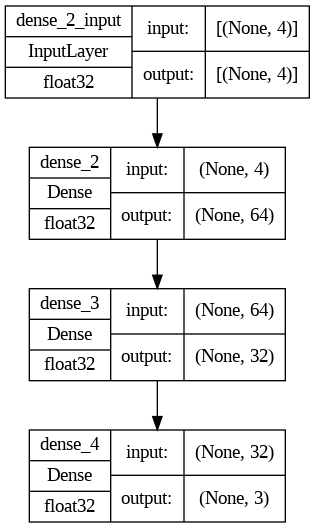

In [ ]:
from tensorflow.keras.utils import plot_model


plot_model(seq_model, show_shapes=True, show_dtype=True)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# this function returns a compiled model using the functional API

def define_model_by_functional_api(input_dim = 4, first_layer=64, output_class=3):
    '''
    returns a compiled model using the functional API
    Argument:
      input_dim: dimensionalities of the input data
      first_layer: number of neurons in the first layer
      output_class: how many classes to predict as output
    Config:
      Three layers: input, hidden1, output
      hidden1 has first_layer/2 neurons
    Return:
      Compiled model
    '''
    # first key difference is that you need
    # a Input layer to handle the input data
    # which is merged in the first hidden layer
    # using the Sequential API
    input1 = Input(shape=(input_dim,))
    # first hidden layer
    # each layer in the functional API needs to be named
    # and at the end of each layer you need to explicitly
    # say what is the input of each layer
    hidden1 = Dense(first_layer, activation='relu')(input1)
    hidden2 = Dense(int(first_layer/2), activation='relu')(hidden1)
    output = Dense(output_class, activation='softmax')(hidden2)
    # just need to tell Keras what is the input and output of the model
    # keras will automatically link the layers in sequence
    model = Model(inputs=input1, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

fun_model = define_model_by_functional_api()
fun_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


# Homework



## Q1. Coding Problem (50%)

With the help of [Part 2](#scrollTo=_Yaj2hVs1FqR&line=7&uniqifier=1), rewrite the model we defined in [Part 1](#scrollTo=Ldqhp20YX3_7) with the functional API.

In [ ]:
X_train.shape[1:]

(28, 28, 1)

In [ ]:
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=X_train.shape[1:])
hidden1 = Convolution2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
hidden2 = MaxPooling2D(pool_size=(2, 2))(hidden1)
flatten = Flatten()(hidden2)
hidden3 = Dense(256, activation='relu')(flatten)
outputs = Dense(10, activation='softmax')(hidden3)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               1384704   
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                           

##Q2. Model Optimization Problem (50%)

Select either the model in [Part 1](#scrollTo=Ldqhp20YX3_7), or the model you write [above](#scrollTo=7UYgywWlSNyL&line=3&uniqifier=1), try to tune some of the hyperparameters manually, and report the model performance(s) after the tuning.

You need to change in all three categories below:
1. adding more layers: you can add more pairs of ``Convolution2D`` and ``MaxPooling2D`` layers in the model;
2. You can change the number of `filters` in each of the ``Convolution2D`` layers;
3. You can change the ``kernel_size`` and ``pool_size`` in the ``Convolution2D`` and ``MaxPooling2D`` layers. Note they need to be square and you can try to make them equal to each other.
4. You can tweak the ``activation`` in the [output layer](#scrollTo=1nT8KhyFopPY&line=3&uniqifier=1). Consider following options: ``sigmoid``, ``tanh``, ``relu``.

Write your code below, and report the best combination of your manual _hyperparameter tuning_.



In [ ]:
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.activations import sigmoid, tanh

inputs = Input(shape=X_train.shape[1:])
hidden1 = Convolution2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
hidden2 = MaxPooling2D(pool_size=(2, 2))(hidden1)
drop1 = Dropout(0.25)(hidden2)
hidden3 = Convolution2D(filters=64, kernel_size=(3, 3), activation='relu')(drop1)
hidden4 = MaxPooling2D(pool_size=(2, 2))(hidden3)
drop2 = Dropout(0.25)(hidden4)
hidden5 = Convolution2D(filters=128, kernel_size=(3, 3), activation='relu')(drop2)
hidden6 = MaxPooling2D(pool_size=(2, 2))(hidden5)
drop3 = Dropout(0.25)(hidden6)
flatten = Flatten()(drop3)
hidden7 = Dense(256, activation='tanh')(flatten)
drop4 = Dropout(0.5)(hidden7)

outputs = Dense(10, activation='softmax')(drop4)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2997 - accuracy: 0.9045 - val_loss: 0.0810 - val_accuracy: 0.9749
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1183 - accuracy: 0.9649 - val_loss: 0.0636 - val_accuracy: 0.9813
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0978 - accuracy: 0.9708 - val_loss: 0.0492 - val_accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0847 - accuracy: 0.9742 - val_loss: 0.0421 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0793 - accuracy: 0.9768 - val_loss: 0.0409 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0651 - accuracy: 0.9805 - val_loss: 0.0429 - val_accura

# Deep Learning & Business Analytics
## Tutorial 1: Setting up the environment
### Dr. Jie Tao, Fairfield University